# OCR with Python - pre-processing techiniques

# Importing the libraries

In [7]:
import pytesseract
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt
import re

In [8]:
#from google.colab.patches import cv2_imshow
def cv2_imshow(img, to_rgb=True):
    if to_rgb:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB
    plt.imshow(img)
    plt.show()

In [9]:
DATAPATH = "../../material/"

# Grayscale

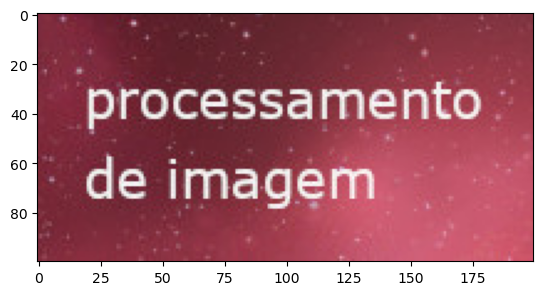

In [10]:
img = cv2.imread(DATAPATH+'Images/img-process.jpg')
cv2_imshow(img)

In [11]:
img.shape

(100, 200, 3)

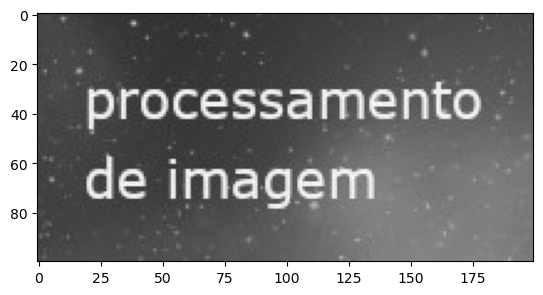

In [12]:
# Convert to grascale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [13]:
gray.shape

(100, 200)

# Thresholding

## Simple thresholding

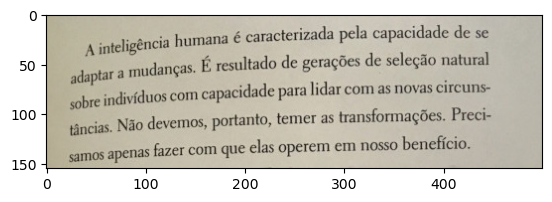

In [15]:
img = cv2.imread(DATAPATH+'Images/page-book.jpg')
cv2_imshow(img)

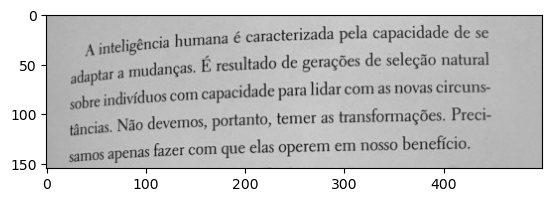

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

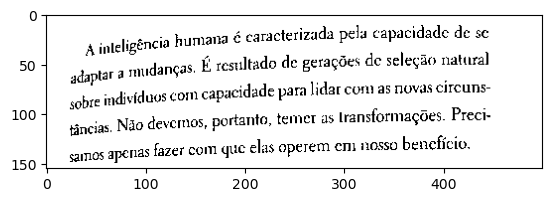

In [18]:
# Thresholding: Binarization
# Simple thresholding: gray image, min-threshold, max, type
# Types of threshold
# - Simple thresholding: cv2.THRESH_BINARY: (global) we provide the threshold value
# - Otsu method: (global) value detected automatically based on histogram; a bi-modal histogram is assumed, where one peak is the BG and the other the FG, i.e., the information
# - Adaptive thresholding: different thresholds for each local region (not global), and then a Gaussian is applied
# Simple thresholding: image, thres, max-vale, cv2.THRESH_BINARY 
value, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [19]:
value

127.0

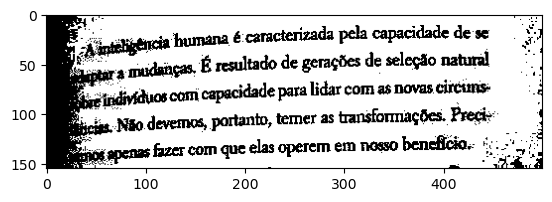

In [20]:
# If we vary the image, shadows might be detected as information
value, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

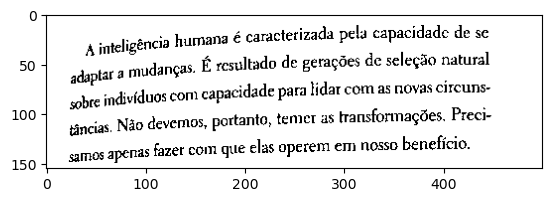

In [22]:
value, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

## Otsu method

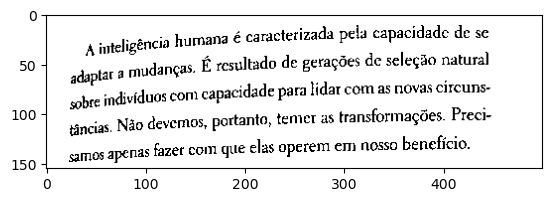

138.0


In [24]:
# The Otsu thresholding method detects the thresholding value automatically
# It assumes the image is bi-modal, where one peak is background
# and the other foreground/information.
# Otsu method: min, max, type: cv2.THRESH_BINARY | cv2.THRESH_OTSU
# However, the Otsu method is not always the best - we need to try!
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

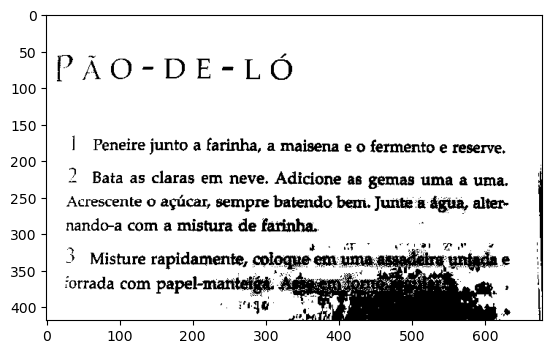

In [26]:
img = cv2.imread(DATAPATH+'Images/recipe01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

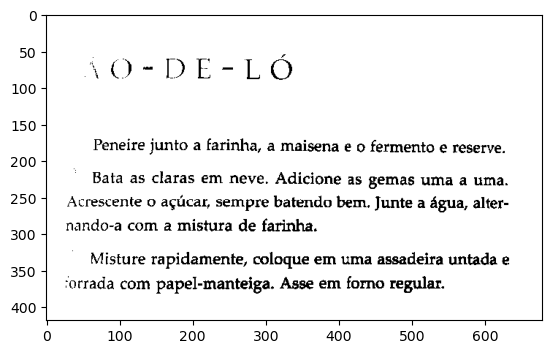

119.0


In [27]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

## Adaptive Thresholding

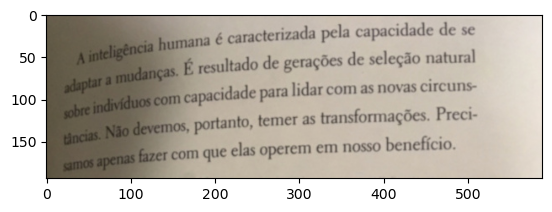

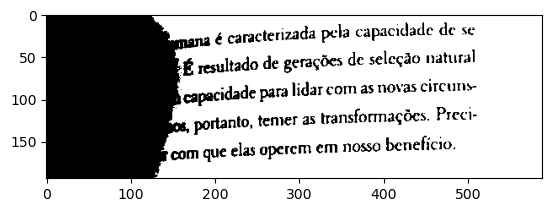

147.0


In [31]:
img = cv2.imread(DATAPATH+'Images/book02.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

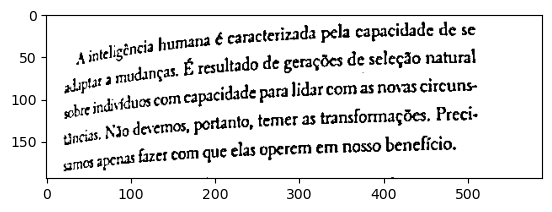

In [33]:
# Adaptive thresholding is best when we have lighting variations in the image
# Instead of computing a global threshold, local values are computed and then
# the result is consolidated either by computing the mean around each pixel
# or applying a Gaussian filter.
# Adaptive with mean: 
# - blockSize: pixel neighborhood that is used to calculate a threshold value for the pixel
# - C: Constant subtracted from the mean or weighted mean
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_average)

## Gaussian Adaptive Thresholding

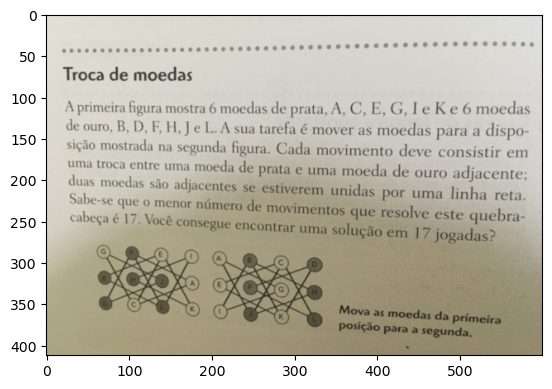

In [35]:
img = cv2.imread(DATAPATH+'Images/book_adaptative.jpg')
cv2_imshow(img)

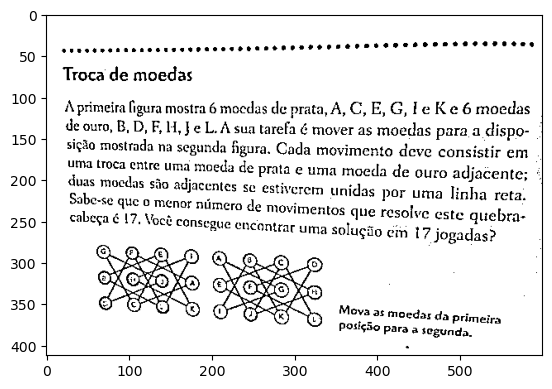

In [39]:
# Adaptive with Gaussian (similar parameters as the mean)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_gaussian)

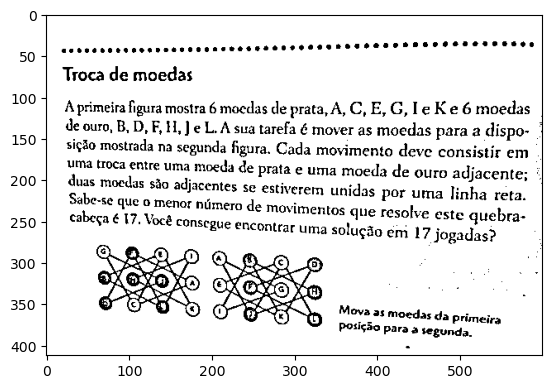

In [40]:
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_average)

# Color inversion

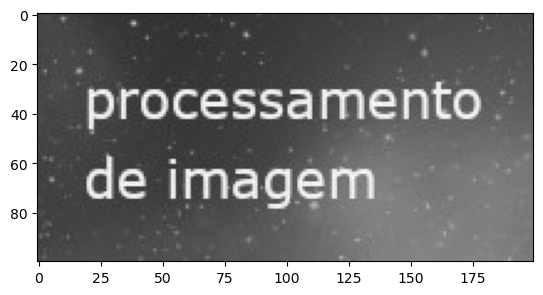

In [51]:
# Color inversion makes sense when we have white letters with dark BG
# The usual recommendation is to have white BG and black/dark FG or letters
img = cv2.imread(DATAPATH+'Images/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [52]:
img.shape, gray.shape

((100, 200, 3), (100, 200))

In [53]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [54]:
# Inversion: just substract the image to the maximum grayvalue
invert = 255 - gray

In [55]:
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

In [56]:
255 - 68

187

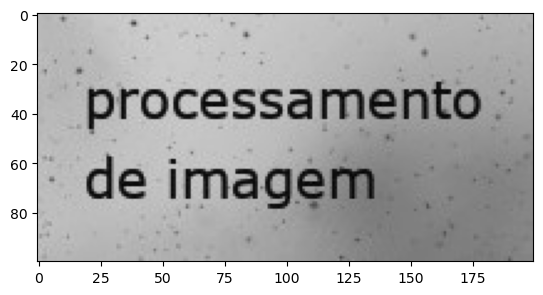

In [57]:
cv2_imshow(invert)

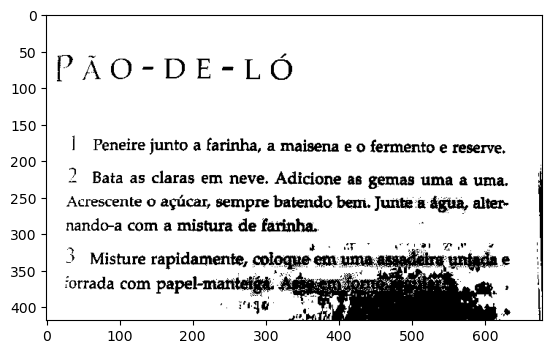

In [58]:
cv2_imshow(thresh)

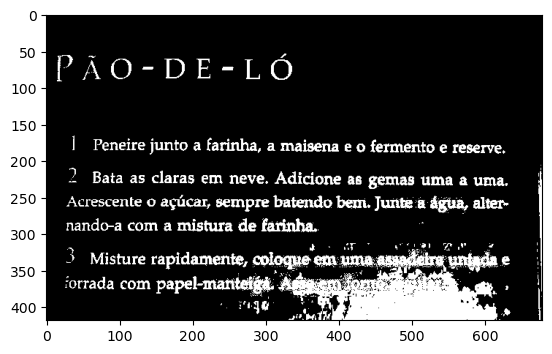

In [59]:
invert = 255 - thresh
cv2_imshow(invert)

# Resizing

- INTER_NEAREST - a nearest neighbor interpolation. It is widely used because it is the fastest
- INTER_LINEAR - a bilinear interpolation (it's used by default), generally good for zooming in and out of images
- INTER_AREA - uses the pixel area ratio. May be a preferred method for image reduction as it provides good results 
- INTER_CUBIC - bicubic (4x4 neighboring pixels). It has better results
- INTER_LANCZOS4 - Lanczos interpolation (8x8 neighboring pixels). Among these algorithms, it is the one with the best quality results.

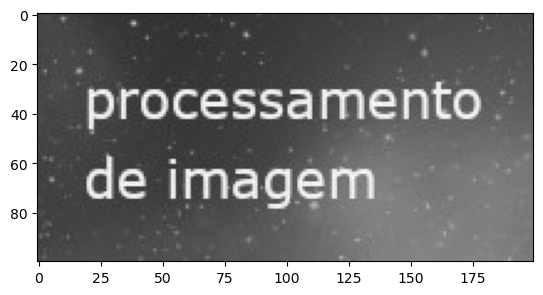

In [60]:
cv2_imshow(gray)

In [61]:
gray.shape

(100, 200)

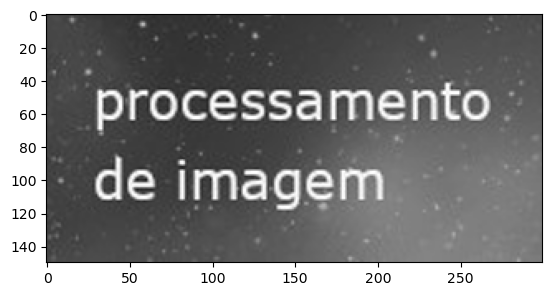

In [66]:
# When resizing, we can increase or decrease the size, and in any direction.
# If the factor is > 1.0, we are increasing the size.
# Usually, the bigger the image, the better for OCR
# If we increase the size, we need to interpolate empty spaces; we have different methods:
# - INTER_NEAREST - a nearest neighbor interpolation. It is widely used because it is the fastest
# - INTER_LINEAR - a bilinear interpolation (it's used by default), generally good for zooming in and out of images
# - INTER_AREA - uses the pixel area ratio. May be a preferred method for image reduction as it provides good results 
# - INTER_CUBIC - bicubic (4x4 neighboring pixels). It has better results
# - INTER_LANCZOS4 - Lanczos interpolation (8x8 neighboring pixels). Among these algorithms, it is the one with the best quality results.
increase = cv2.resize(gray, None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(increase)

In [64]:
increase.shape

(150, 300)

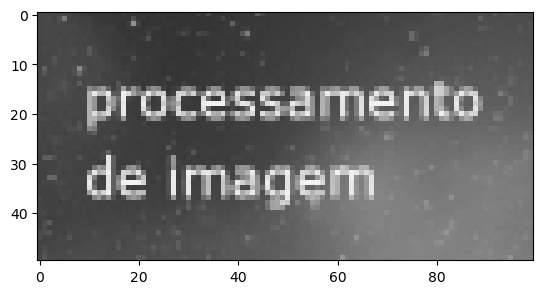

In [65]:
decrease = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation=cv2.INTER_AREA)
cv2_imshow(decrease)

In [ ]:
decrease.shape

(50, 100)

# Morphological operations

## Erosion

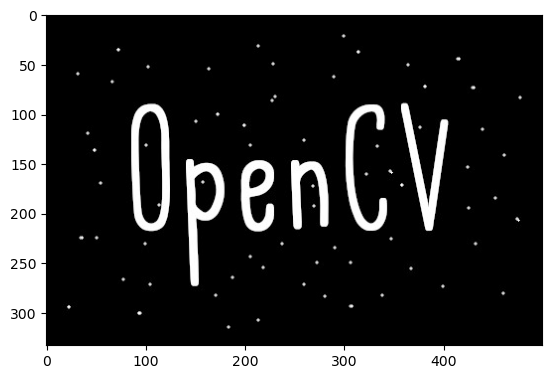

In [68]:
img = cv2.imread(DATAPATH+'Images/text-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [69]:
np.ones((3,3), np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

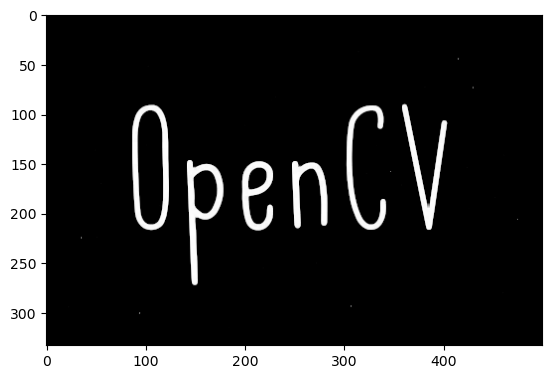

In [76]:
# Erosion: remove pixels with a kernel
# The size of the kernel depends on the size of the noise/spots
# Small spots (smaller than the kernel) are removed, but everything is thinned
erosion = cv2.erode(gray, np.ones((3,3), np.uint8))
cv2_imshow(erosion)

## Dilation

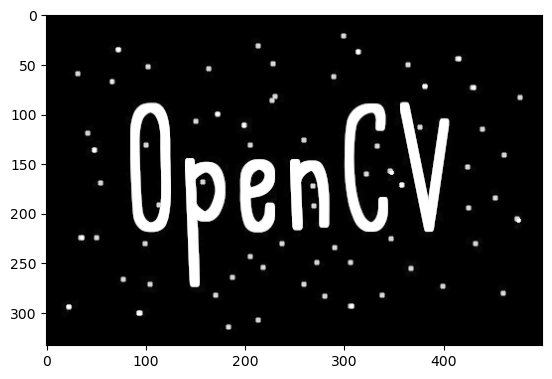

In [77]:
# Dilation: Add pixels with a kernel
# The size of the kernel depends on the size of the noise/spots
# Small spots are emphasized
dilation = cv2.dilate(gray, np.ones((3,3), np.uint8))
cv2_imshow(dilation)

## Opening

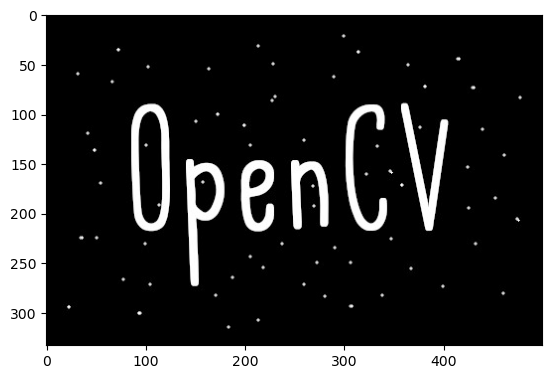

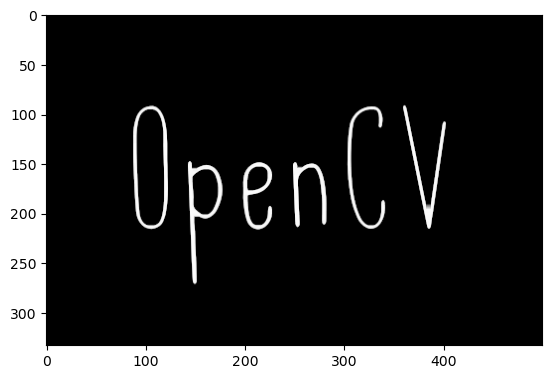

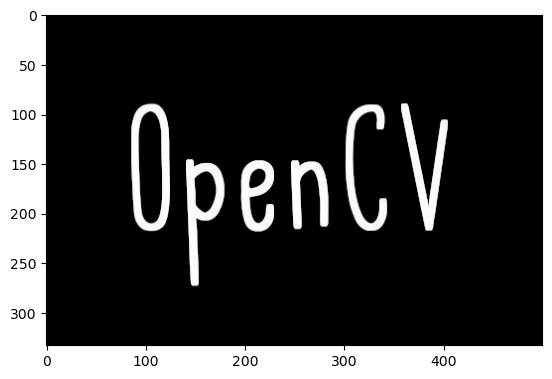

In [78]:
# Opening: Erosion + Dilation: salt/pepper noise is removed while maintaining thickness
erosion = cv2.erode(gray, np.ones((5,5), np.uint8))
opening = cv2.dilate(erosion, np.ones((5,5), np.uint8))
cv2_imshow(gray)
cv2_imshow(erosion)
cv2_imshow(opening)

## Closing

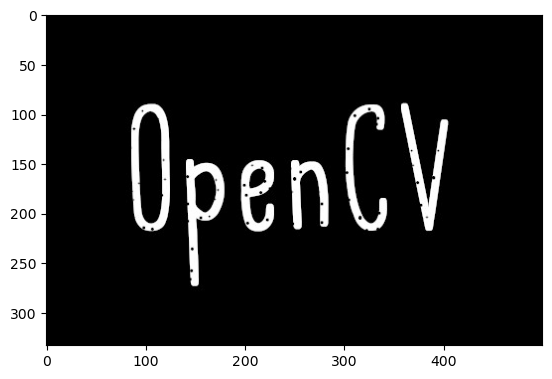

In [80]:
# Closing: Dilation + Erosion:
# Holes are filled/closed while maintaining thickness
img = cv2.imread(DATAPATH+'Images/text-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

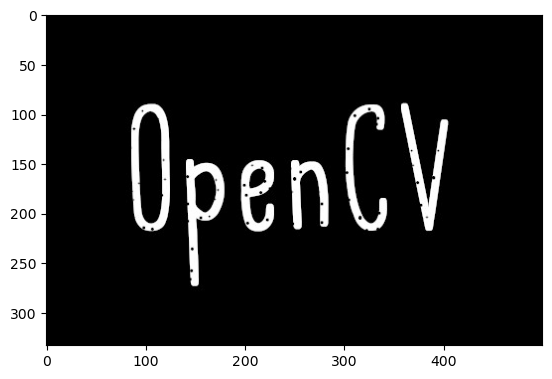

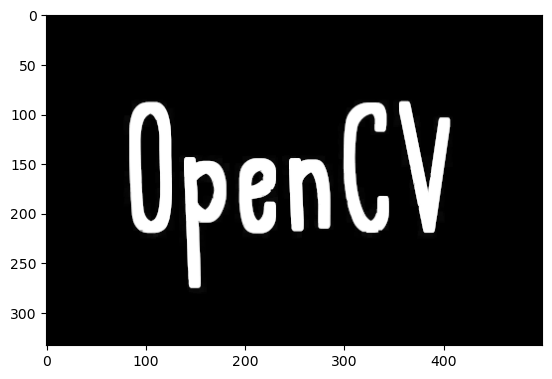

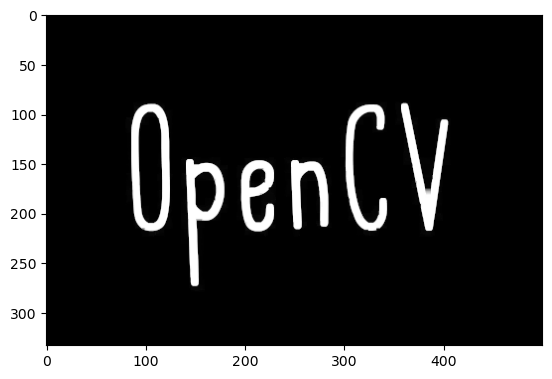

In [81]:
dilation = cv2.dilate(gray, np.ones((5,5), np.uint8))
closing = cv2.erode(dilation, np.ones((5,5), np.uint8))
cv2_imshow(gray)
cv2_imshow(dilation)
cv2_imshow(closing)

# Noise removal

## Average blur

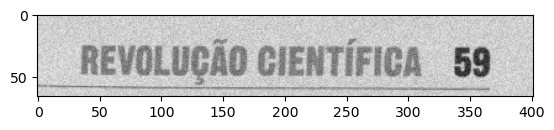

In [83]:
# We can use filters to reduce noise or emphasize signals:
# - Lowpass filters remove noise but blur the image
# - Highpass filters emphasize the signal, but also the noise
img = cv2.imread(DATAPATH+'Images/test_noise.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

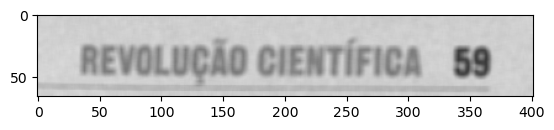

In [85]:
# Agerage/mean filtering
average_blur = cv2.blur(gray, (5,5))
cv2_imshow(average_blur)

## Gaussian blur


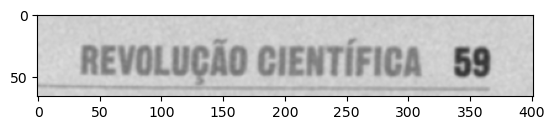

In [86]:
# Gaussian filter
gaussian_blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2_imshow(gaussian_blur)

## Median blur

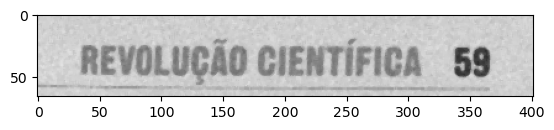

In [87]:
# Median blur
median_blur = cv2.medianBlur(gray, 3)
cv2_imshow(median_blur)

## Bilateral filter

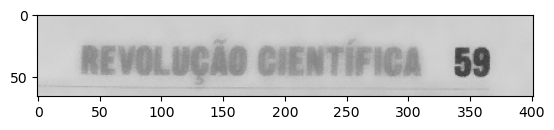

In [107]:
# Bilateral filter: noise is reduced, while preserving the edges
# Look at the documentation for more information on the parameters
bilateral_filter = cv2.bilateralFilter(gray, 15, 55, 45)
cv2_imshow(bilateral_filter)

# Text detection

In [100]:
#!sudo apt install tesseract-ocr
#!pip install pytesseract

In [101]:
import pytesseract

In [102]:
#!mkdir tessdata
#!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
#!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

In [103]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(average_blur, lang = 'por', config=config_tesseract)
#text = pytesseract.image_to_string(average_blur, lang = 'por')
print(text)

In [104]:
# We need to try different processed images to see which one is better for OCR
text = pytesseract.image_to_string(median_blur, lang = 'por', config=config_tesseract)
print(text)

— REVOLUÇÃO CIENTÍFICA 59



# Homework

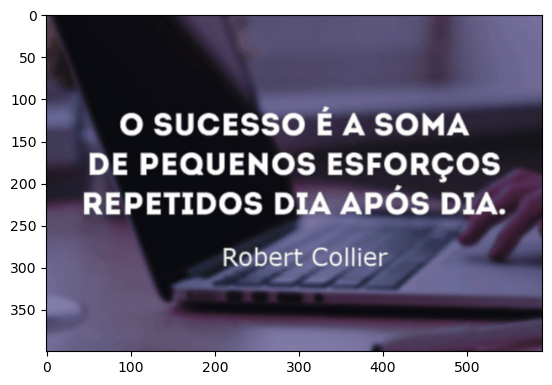

In [108]:
img = cv2.imread(DATAPATH+'Images/sentence.jpg')
cv2_imshow(img)

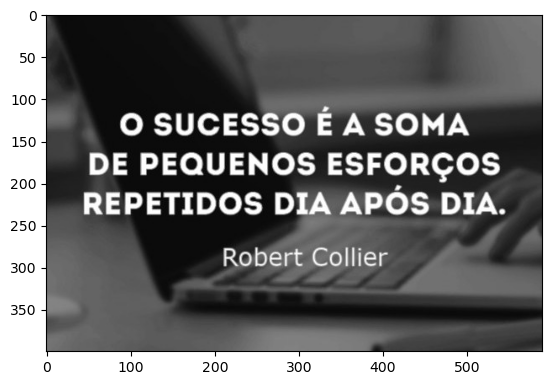

In [109]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

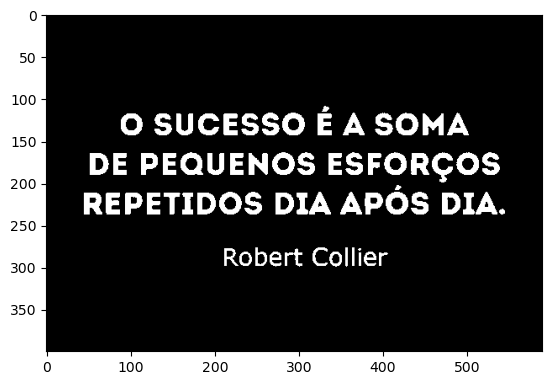

145.0


In [110]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(thresh)
print(value)

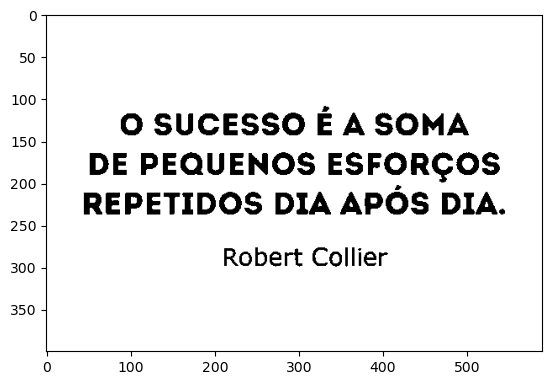

In [111]:
invert = 255 - thresh
cv2_imshow(invert)

In [112]:
print(pytesseract.image_to_string(thresh, lang = 'por', config=config_tesseract))

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

